## 背景
以银行产品认购预测为背景，想让你来预测下客户是否会购买银行的产品。在和客户沟通的过程中，我们记录了和客户联系的次数，上一次联系的时长，上一次联系的时间间隔，同时在银行系统中我们保存了客户的基本信息，包括：年龄、职业、婚姻、之前是否有违约、是否有房贷等信息，此外我们还统计了当前市场的情况：就业、消费信息、银行同业拆解率等。


## 任务
To DO：预测用户是否进行购买产品

subscribe 客户是否认购了理财产品（'是'、'否'）

age 客户年龄

job 工作类型（'行政'、'蓝领'、'企业家'、'女佣'、'管理'、'退休'、'自雇'、'服务'、'学生'、'技术员'、'失业'、'未知'）

marital 婚姻状况（'离婚'、'已婚'、'单身'、'不详'；注：'离婚'指离婚或丧偶）

education 教育程度（'基础4年'、'基础6年'、'基础9年'、'高中'、'文盲'、'专业课程'、'大学学位'、'未知'）

default 是否有违约信贷（'没有'、'有'、'未知'）

housing 是否有住房贷款（'否'、'是'、'未知'）

loan 是否有个人贷款（'否'、'是'、'未知'）

contact 联系通信类型（'手机'、'电话'）

month 最后一次联系的月份

day_of_week 最后一次联系的星期

duration 最后一次联系的持续时间（秒）

campaign 本次活动期间为该客户进行的接触次数

pdays 上次活动中最后一次与客户联系后的天数

previous 本次活动前，与该客户进行的接触次数

poutcome 上次营销活动的结果（"失败"、"不存在"、"成功"）

emp_var_rate 就业变化率（季度指标）

cons_price_index 消费者价格指数（月度指标）

cons_conf_index 消费者信心指数（月度指标）

lending_rate3m 银行3个月定期存款利率（每日指标）

nr_employed 雇员人数（季度指标）


# 读取数据

导入数据分析所需要pandas的read_csv函数，将员工是数据文件train里的数据内容，解析为DataFrame并赋值给变量train

In [1]:
import pandas as pd

In [2]:
train=pd.read_csv("C:/Users/Lenovo/Downloads/作品/银行/train .csv")
train

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe
0,1,51,admin.,divorced,professional.course,no,yes,yes,cellular,aug,...,1,112,2,failure,1.4,90.81,-35.53,0.69,5219.74,0
1,2,50,services,married,high.school,unknown,yes,no,cellular,may,...,1,412,2,nonexistent,-1.8,96.33,-40.58,4.05,4974.79,1
2,3,48,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,...,0,1027,1,failure,-1.8,96.33,-44.74,1.50,5022.61,0
3,4,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,...,26,998,0,nonexistent,1.4,97.08,-35.55,5.11,5222.87,1
4,5,45,admin.,single,university.degree,no,no,no,cellular,nov,...,1,240,4,success,-3.4,89.82,-33.83,1.17,4884.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,22496,33,admin.,married,high.school,no,no,no,cellular,aug,...,3,925,3,failure,-2.9,92.47,-43.30,3.36,5203.22,1
22496,22497,34,admin.,divorced,high.school,no,unknown,unknown,cellular,aug,...,14,533,3,failure,1.4,93.64,-26.27,4.41,4914.80,0
22497,22498,25,admin.,married,professional.course,no,yes,no,cellular,may,...,0,792,5,success,-1.8,90.43,-36.75,4.05,5114.30,0
22498,22499,57,retired,married,high.school,no,yes,no,telephone,may,...,5,989,0,nonexistent,1.1,89.38,-37.96,4.95,5284.43,0


# 数据的评估和清理

这一部分中，将对在上一部分建立的train所包含的数据进行评估和清理

主要从两个方面进行：结构和内容，即整齐度和干净度

数据的结构性问题指的是不符合“每个变量为一列，每个观察值为一行，每种类型的观察值为一个表格”这三个标准，数据的内容性问题包括存在丢失数据、重复数据、无效数据

## 数据的整齐度

In [3]:
train.head(10)

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe
0,1,51,admin.,divorced,professional.course,no,yes,yes,cellular,aug,...,1,112,2,failure,1.4,90.81,-35.53,0.69,5219.74,0
1,2,50,services,married,high.school,unknown,yes,no,cellular,may,...,1,412,2,nonexistent,-1.8,96.33,-40.58,4.05,4974.79,1
2,3,48,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,...,0,1027,1,failure,-1.8,96.33,-44.74,1.50,5022.61,0
3,4,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,...,26,998,0,nonexistent,1.4,97.08,-35.55,5.11,5222.87,1
4,5,45,admin.,single,university.degree,no,no,no,cellular,nov,...,1,240,4,success,-3.4,89.82,-33.83,1.17,4884.70,0
5,6,47,management,married,unknown,no,no,no,cellular,jul,...,1,10,3,nonexistent,1.4,94.58,-30.37,3.55,5257.02,0
6,7,33,technician,married,high.school,no,yes,no,cellular,aug,...,2,1009,0,nonexistent,1.4,94.93,-35.12,4.74,5018.97,0
7,8,40,technician,married,basic.9y,yes,no,unknown,cellular,apr,...,36,934,4,success,1.4,94.44,-33.52,4.61,5452.31,0
8,9,47,services,married,high.school,no,no,no,cellular,aug,...,0,959,0,nonexistent,1.4,95.40,-37.65,5.09,5358.80,0
9,10,53,housemaid,married,unknown,no,no,no,cellular,aug,...,0,594,6,success,-2.9,93.17,-28.27,2.30,4988.07,1


由于数据具有22列，这里显示不全，在下面将显示完整的列

In [4]:
pd.set_option("display.max_columns",100)
train.head(10)

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe
0,1,51,admin.,divorced,professional.course,no,yes,yes,cellular,aug,mon,4621,1,112,2,failure,1.4,90.81,-35.53,0.69,5219.74,0
1,2,50,services,married,high.school,unknown,yes,no,cellular,may,mon,4715,1,412,2,nonexistent,-1.8,96.33,-40.58,4.05,4974.79,1
2,3,48,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,wed,171,0,1027,1,failure,-1.8,96.33,-44.74,1.50,5022.61,0
3,4,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,fri,359,26,998,0,nonexistent,1.4,97.08,-35.55,5.11,5222.87,1
4,5,45,admin.,single,university.degree,no,no,no,cellular,nov,tue,3178,1,240,4,success,-3.4,89.82,-33.83,1.17,4884.70,0
5,6,47,management,married,unknown,no,no,no,cellular,jul,thu,817,1,10,3,nonexistent,1.4,94.58,-30.37,3.55,5257.02,0
6,7,33,technician,married,high.school,no,yes,no,cellular,aug,mon,76,2,1009,0,nonexistent,1.4,94.93,-35.12,4.74,5018.97,0
7,8,40,technician,married,basic.9y,yes,no,unknown,cellular,apr,mon,4391,36,934,4,success,1.4,94.44,-33.52,4.61,5452.31,0
8,9,47,services,married,high.school,no,no,no,cellular,aug,thu,161,0,959,0,nonexistent,1.4,95.40,-37.65,5.09,5358.80,0
9,10,53,housemaid,married,unknown,no,no,no,cellular,aug,fri,2437,0,594,6,success,-2.9,93.17,-28.27,2.30,4988.07,1


数据符合“每个变量为一列，每个观察值为一行，每种类型的观察值为一个表格”这三个标准，因此数据的干净度不存在问题

## 数据的干净度

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                22500 non-null  int64  
 1   age               22500 non-null  int64  
 2   job               22500 non-null  object 
 3   marital           22500 non-null  object 
 4   education         22500 non-null  object 
 5   default           22500 non-null  object 
 6   housing           22500 non-null  object 
 7   loan              22500 non-null  object 
 8   contact           22500 non-null  object 
 9   month             22500 non-null  object 
 10  day_of_week       22500 non-null  object 
 11  duration          22500 non-null  int64  
 12  campaign          22500 non-null  int64  
 13  pdays             22500 non-null  int64  
 14  previous          22500 non-null  int64  
 15  poutcome          22500 non-null  object 
 16  emp_var_rate      22500 non-null  float6

共有2250组数据，其中job(职业)、marital(婚姻)、education(教育程度)、default（信用卡是否有违约）、housing（是否有房贷）、loan(是否有个人贷款)、contact（联系方式）、month（上一次联系的月份）、day_of_week(最后一次联系的星期)、poutcome（之前营销活动的结果）、subscribe（客户是否进行购买）的数据类型应该为分类变量,id应为字符串，因此需要进行修改

In [6]:
train["id"]=train["id"].astype("str")
train["job"]=train["job"].astype("category")
train["marital"]=train["marital"].astype("category")
train["education"]=train["education"].astype("category")
train["default"]=train["default"].astype("category")
train["housing"]=train["housing"].astype("category")
train["loan"]=train["loan"].astype("category")
train["contact"]=train["contact"].astype("category")
train["month"]=train["month"].astype("category")
train["day_of_week"]=train["day_of_week"].astype("category")
train["poutcome"]=train["poutcome"].astype("category")
train["subscribe"]=train["subscribe"].astype("category")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                22500 non-null  object  
 1   age               22500 non-null  int64   
 2   job               22500 non-null  category
 3   marital           22500 non-null  category
 4   education         22500 non-null  category
 5   default           22500 non-null  category
 6   housing           22500 non-null  category
 7   loan              22500 non-null  category
 8   contact           22500 non-null  category
 9   month             22500 non-null  category
 10  day_of_week       22500 non-null  category
 11  duration          22500 non-null  int64   
 12  campaign          22500 non-null  int64   
 13  pdays             22500 non-null  int64   
 14  previous          22500 non-null  int64   
 15  poutcome          22500 non-null  category
 16  emp_var_rate      2250

## 检查重复数据

有资料可知,每个顾客对应一个id,可以通过查询出现重复id来判断是否有重复数据

In [7]:
train["id"].duplicated().sum()

np.int64(0)

没有重复id出现，即数据表中没有重复值

## 检查分类变量中的不一致数据

其中job(职业)、marital(婚姻)、education(教育程度)、default（信用卡是否有违约）、housing（是否有房贷）、loan(是否有个人贷款)、contact（联系方式）、month（上一次联系的月份）、day_of_week(最后一次联系的星期)、poutcome（之前营销活动的结果）、subscribe（客户是否进行购买）的数据类型为分类变量，查询他们中各个值出现的次数

In [8]:
train["job"].value_counts()

job
admin.           5557
blue-collar      4874
technician       3530
services         2083
management       1600
retired          1006
entrepreneur      863
self-employed     836
housemaid         657
unemployed        647
student           573
unknown           274
Name: count, dtype: int64

未发现不一致数据

In [9]:
train["marital"].value_counts()

marital
married     13178
single       6344
divorced     2658
unknown       320
Name: count, dtype: int64

未发现不一致数据

In [10]:
train["education"].value_counts()

education
university.degree      6524
high.school            5031
basic.9y               3266
professional.course    2853
basic.4y               2322
basic.6y               1349
unknown                 994
illiterate              161
Name: count, dtype: int64

未发现不一致数据

In [11]:
train["default"].value_counts()

default
no         17261
unknown     4860
yes          379
Name: count, dtype: int64

未发现不一致数据

In [12]:
train["housing"].value_counts()

housing
yes        11568
no         10046
unknown      886
Name: count, dtype: int64

未发现不一致数据

In [13]:
train["loan"].value_counts()

loan
no         17954
yes         3657
unknown      889
Name: count, dtype: int64

未发现不一致数据

In [14]:
train["contact"].value_counts()

contact
cellular     14181
telephone     8319
Name: count, dtype: int64

未发现不一致数据

In [15]:
train["month"].value_counts()

month
may    7235
jul    3815
aug    3340
jun    2838
nov    2242
apr    1510
oct     494
mar     426
sep     401
dec     199
Name: count, dtype: int64

未发现不一致数据

In [16]:
train["day_of_week"].value_counts()

day_of_week
thu    4728
mon    4653
wed    4458
tue    4414
fri    4247
Name: count, dtype: int64

未发现不一致数据

In [17]:
train["poutcome"].value_counts()

poutcome
nonexistent    14618
failure         4442
success         3440
Name: count, dtype: int64

未发现不一致数据

In [18]:
train["subscribe"].value_counts()

subscribe
0    19548
1     2952
Name: count, dtype: int64

未发现不一致数据,但根据说明判断，1应该代表yes,0代表no,因此需要更改数值名称

In [19]:
train["subscribe"]=train["subscribe"].astype("str")
train["subscribe"]=train["subscribe"].replace({"1":"yes","0":"no"})
train["subscribe"]=train["subscribe"].astype("category")
train["subscribe"].value_counts()

subscribe
no     19548
yes     2952
Name: count, dtype: int64

## 查看异常数据

In [20]:
train.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,40.407511,1146.303733,3.364800,773.991956,1.316444,0.078529,93.548785,-39.877180,3.302490,5137.211285
std,12.086078,1432.432125,7.223837,326.934334,1.918733,1.573831,2.805786,5.805442,1.611777,170.670611
min,16.000000,0.000000,0.000000,0.000000,0.000000,-3.400000,87.640000,-53.280000,0.600000,4715.420000
25%,32.000000,143.000000,1.000000,557.750000,0.000000,-1.800000,91.190000,-44.160000,1.430000,5008.510000
50%,38.000000,353.000000,1.000000,964.000000,0.000000,1.100000,93.540000,-40.600000,3.920000,5133.955000
75%,47.000000,1873.000000,3.000000,1005.000000,2.000000,1.400000,95.920000,-35.797500,4.830000,5267.677500
max,101.000000,5149.000000,57.000000,1048.000000,6.000000,1.400000,99.460000,-25.550000,5.270000,5489.500000


未发现异常数据

## 保存数据

将修改好后的文件命名为new_train,以csv文件的形式进行保存

In [21]:
train.to_csv("new_train.csv",index=False)

# 可视化图表分析

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
sns.set_palette("pastel")
plt.rcParams["figure.figsize"]=[14.00,7]
plt.rcParams["figure.autolayout"]=True

## 客户年龄与认购情况

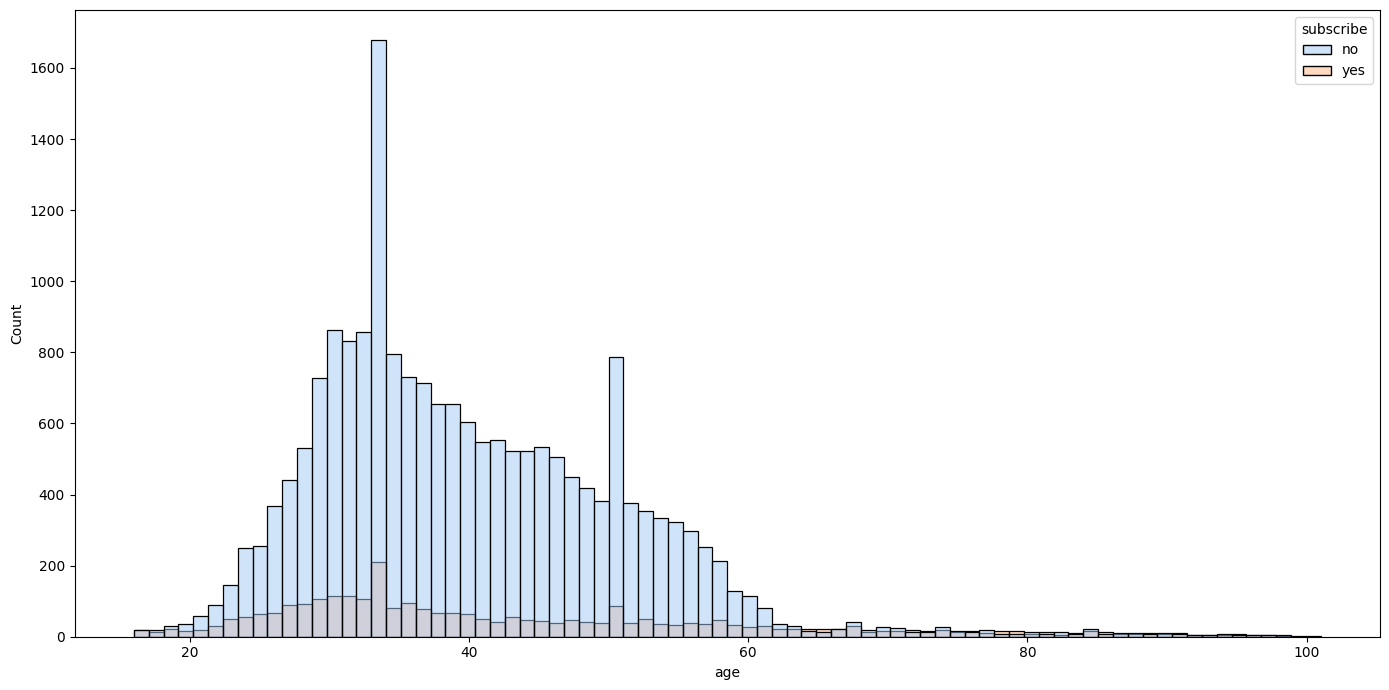

In [24]:
sns.histplot(train,x="age",hue="subscribe")
plt.show()

观察到客户年龄呈又偏态分布，在大致在30岁前用户数量大致岁年龄的增大，当客户年龄大于30岁客户数量随年龄的增大而减少，但在50岁左右的时候，客户数量突然增多。
在20岁之前的客户，同以购买的概率比较大

## 客户职业与认购情况

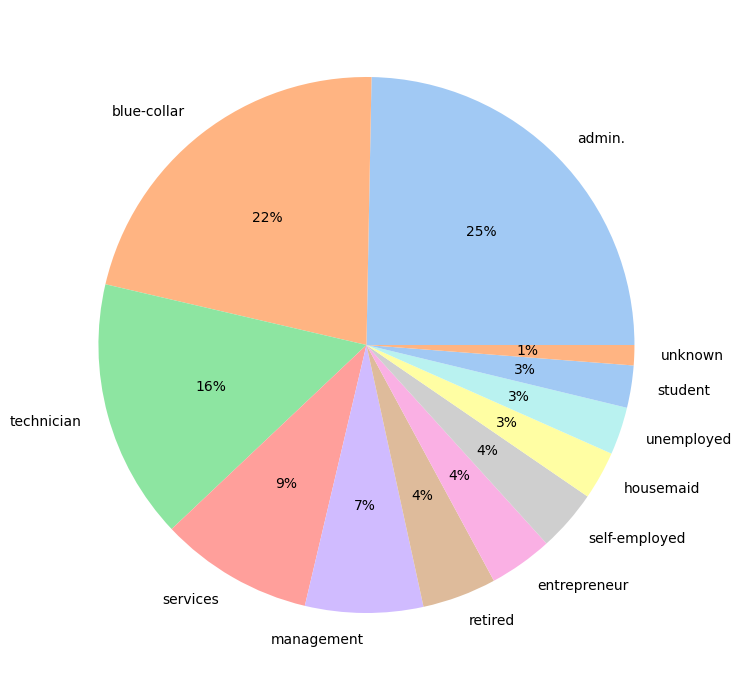

In [25]:
job_counts=train["job"].value_counts()
jobs=job_counts.index
plt.pie(job_counts,labels=jobs,autopct='%1.0f%%')
plt.show()

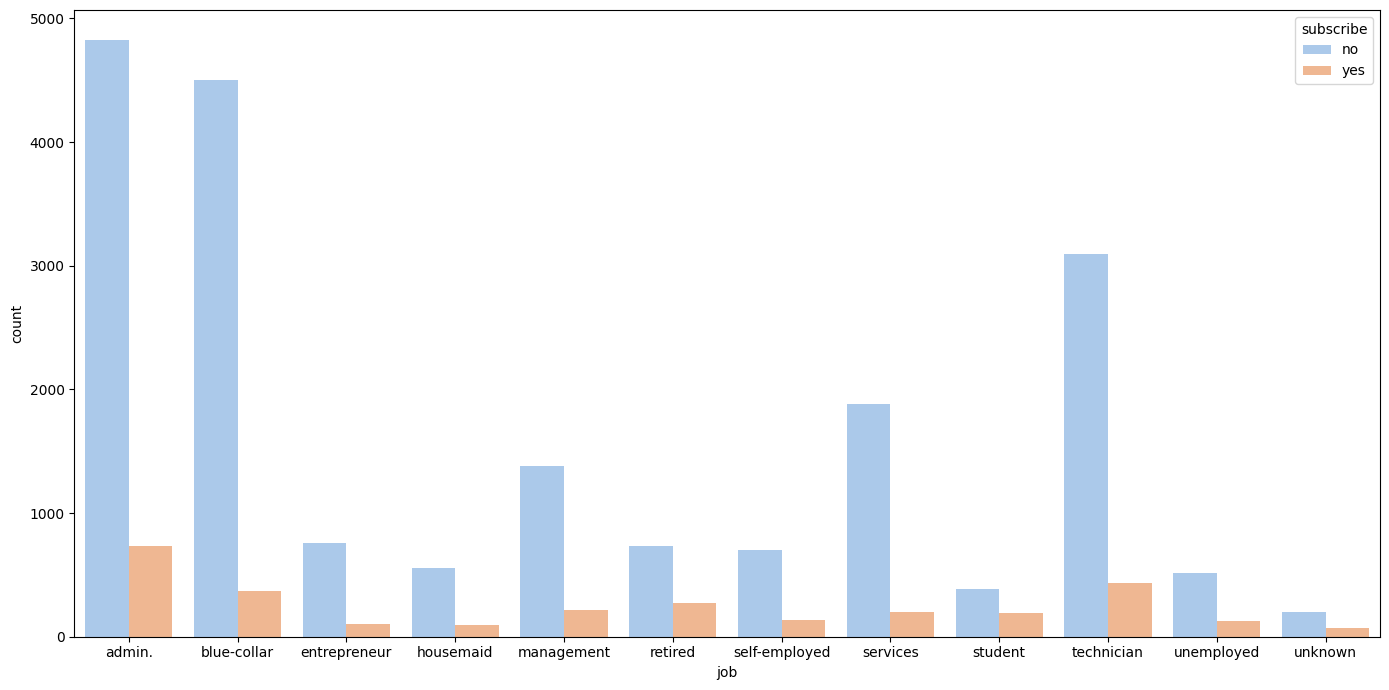

In [26]:
sns.countplot(train,x="job",hue="subscribe") 
plt.show()

客户中职业为行政的人最多，占到了总人数的1/4，购买产品的概率最大的是学生

## 客户婚姻状况与认购情况

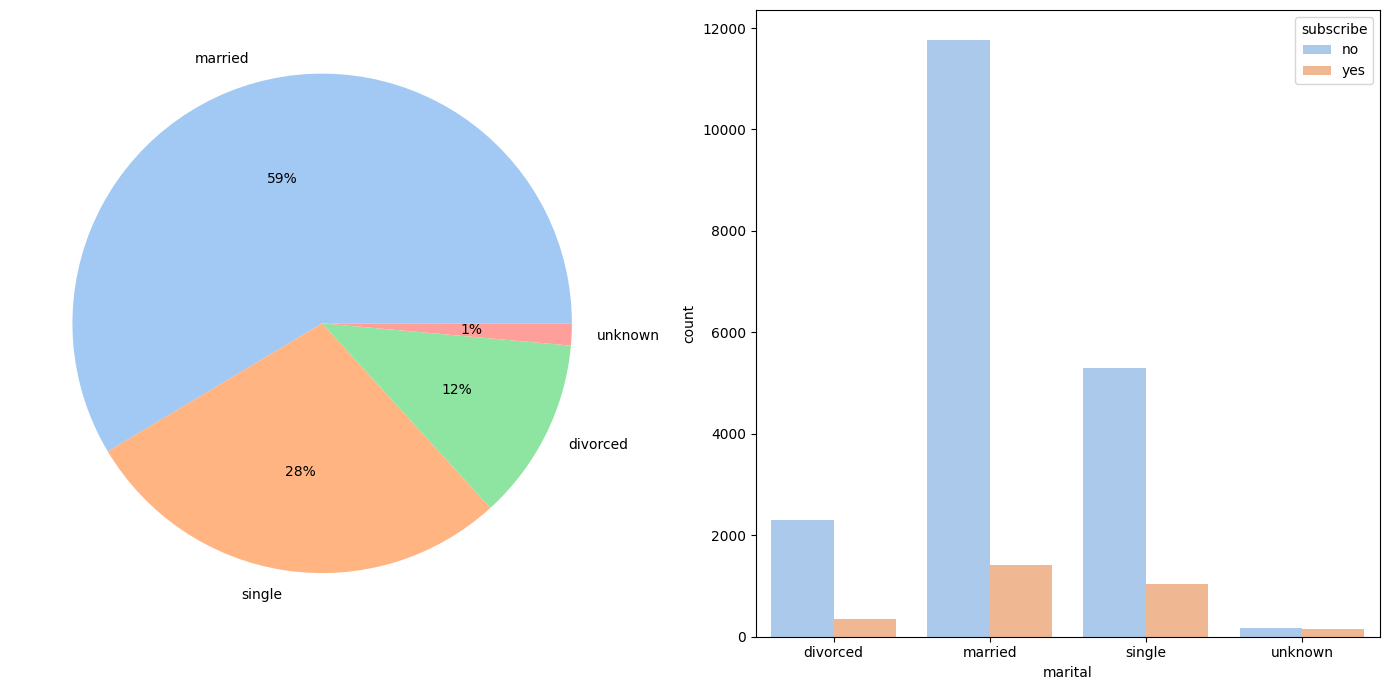

In [27]:
figure,axes=plt.subplots(1,2)
marital_counts=train["marital"].value_counts()
maritals=marital_counts.index
ax=axes[0].pie(marital_counts,labels=maritals,autopct='%1.0f%%')
sns.countplot(train,x="marital",hue="subscribe") 
plt.show()

客户中结婚的人数最多，但单身人士购买产品的可能性最高

## 违约信贷与认购情况

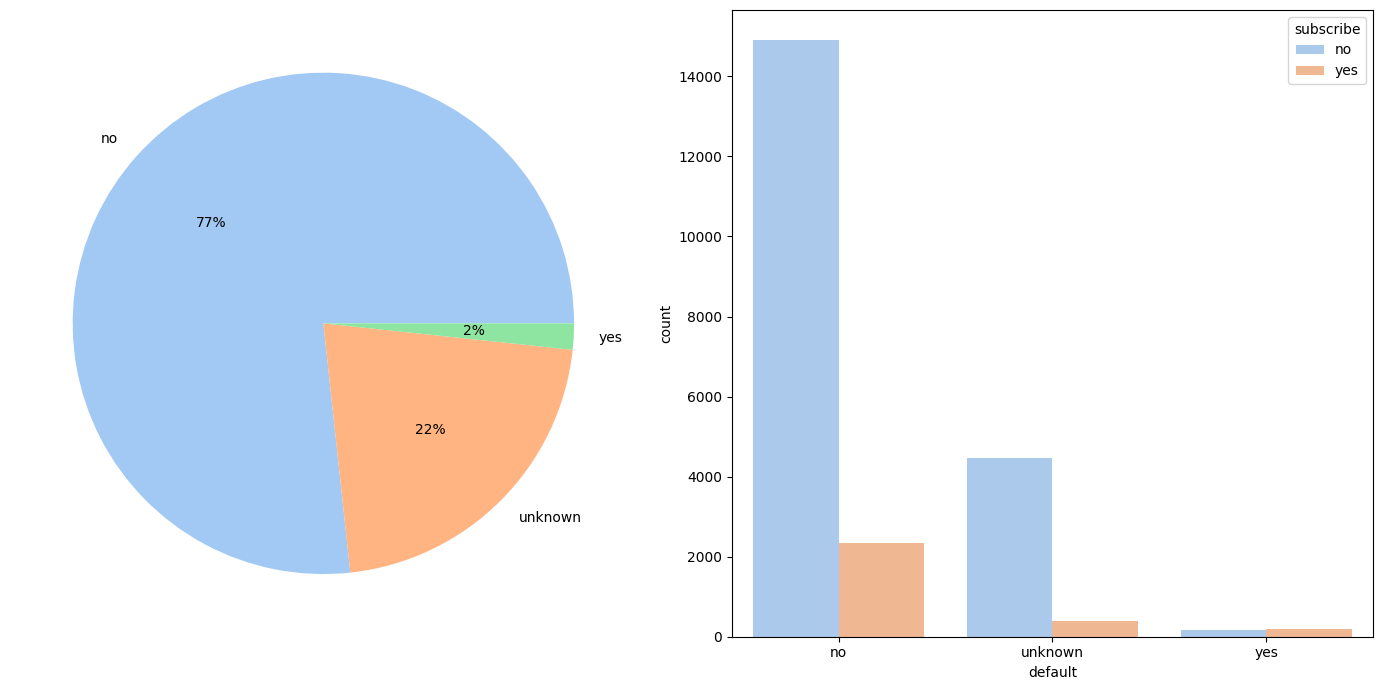

In [28]:
figure,axes=plt.subplots(1,2)
default_counts=train["default"].value_counts()
defaults=default_counts.index
ax=axes[0].pie(default_counts,labels=defaults,autopct='%1.0f%%')
sns.countplot(train,x="default",hue="subscribe") 
plt.show()

绝大部分客户都没有违约经历，但有违约经历的人购买产品的概率较高

## 房贷与认购情况

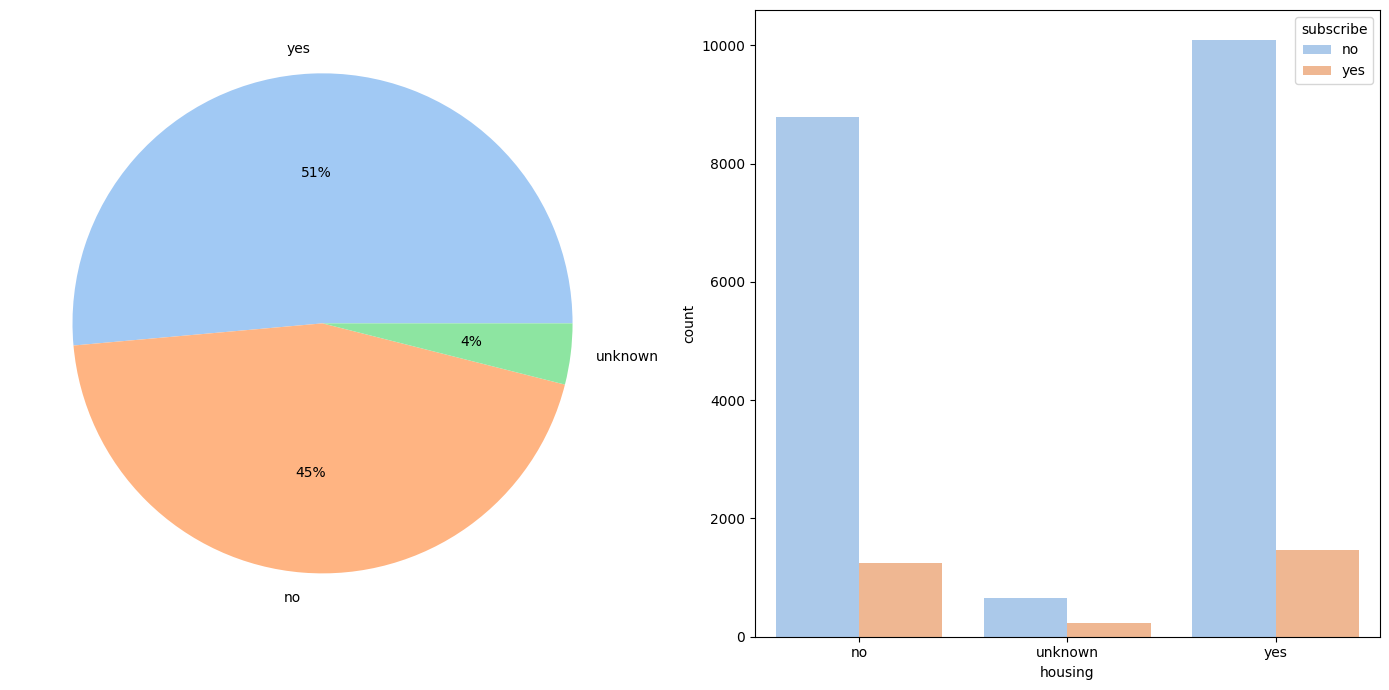

In [29]:
figure,axes=plt.subplots(1,2)
housing_counts=train["housing"].value_counts()
housings=housing_counts.index
ax=axes[0].pie(housing_counts,labels=housings,autopct='%1.0f%%')
sns.countplot(train,x="housing",hue="subscribe") 
plt.show()

客户中有房贷的最多，但没有房贷的客户购买概率略高于有房贷的客户

## 个人贷款与认购情况

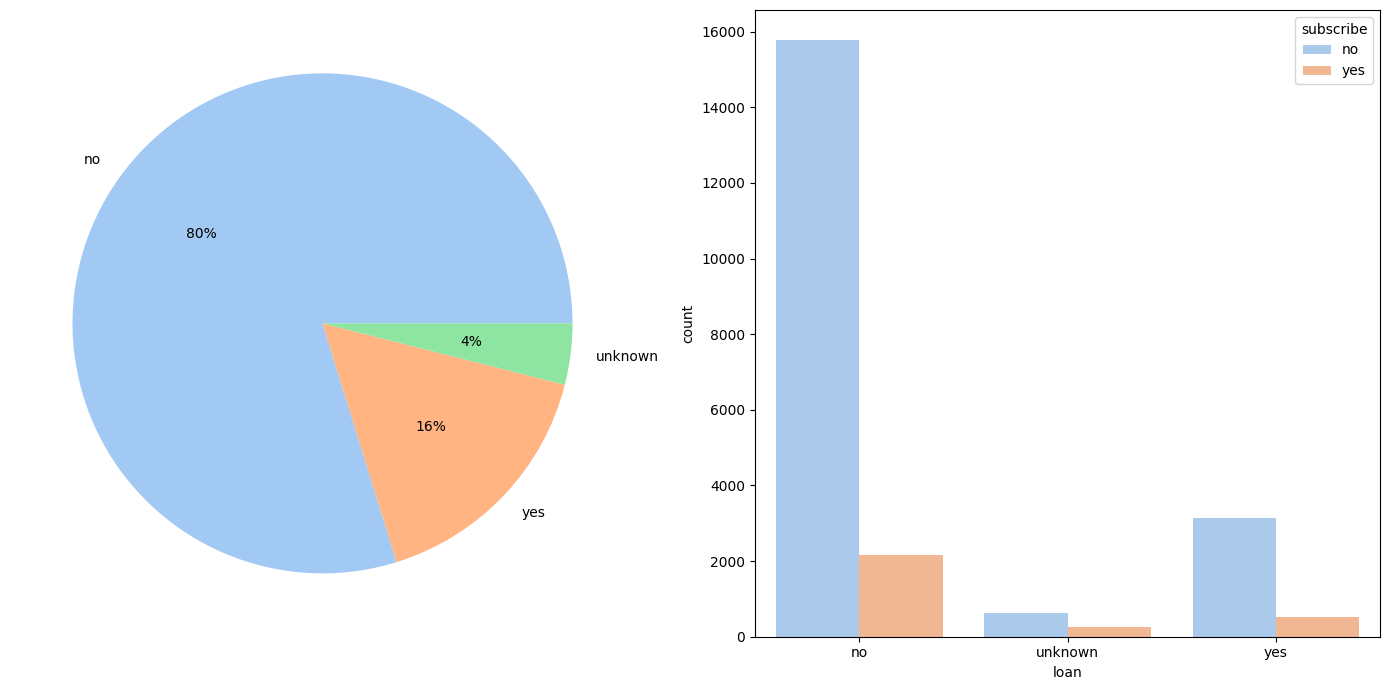

In [30]:
figure,axes=plt.subplots(1,2)
loan_counts=train["loan"].value_counts()
loans=loan_counts.index
ax=axes[0].pie(loan_counts,labels=loans,autopct='%1.0f%%')
sns.countplot(train,x="loan",hue="subscribe") 
plt.show()

绝大多数客户没有个人贷款，有个人贷款的客户购买产品的概率最高

## 联系通信类型和认购情况

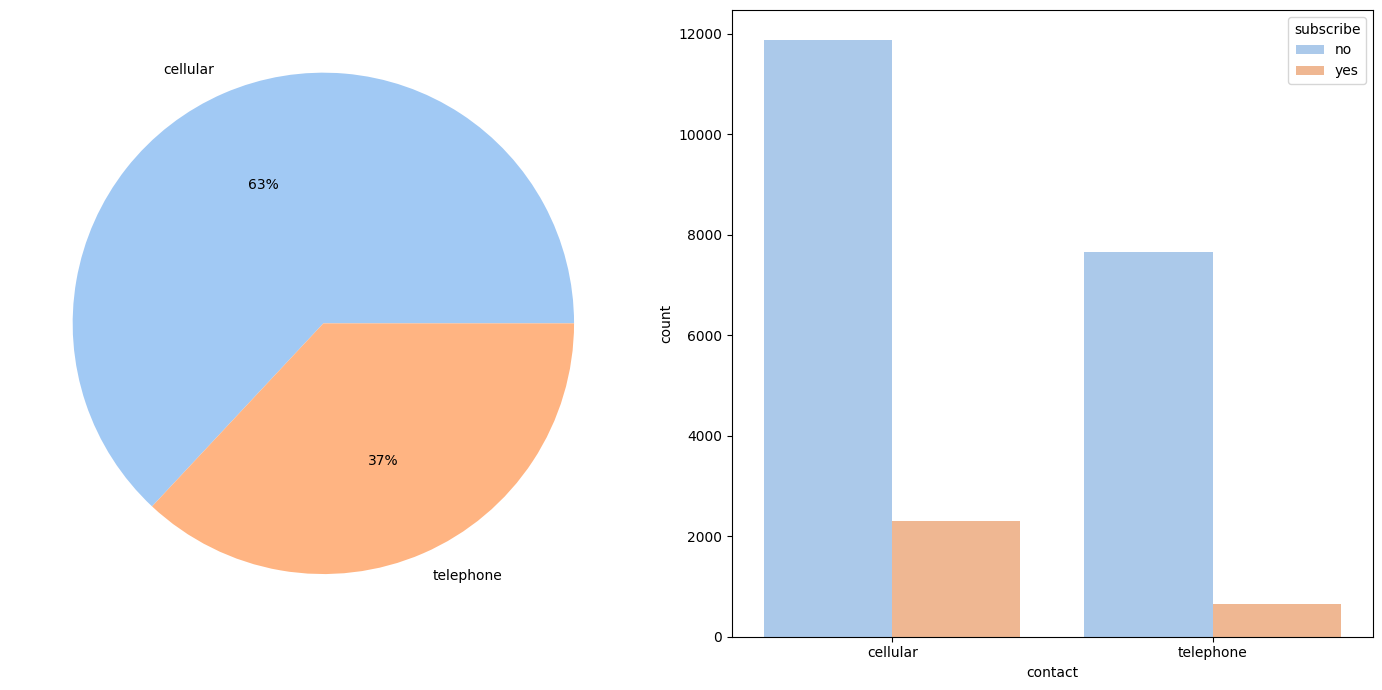

In [31]:
figure,axes=plt.subplots(1,2)
contact_counts=train["contact"].value_counts()
contacts=contact_counts.index
ax=axes[0].pie(contact_counts,labels=contacts,autopct='%1.0f%%')
sns.countplot(train,x="contact",hue="subscribe") 
plt.show()

留下cellular的客户最多，留下cellular的客户购买最大

## 最后一次联系月份和认购情况

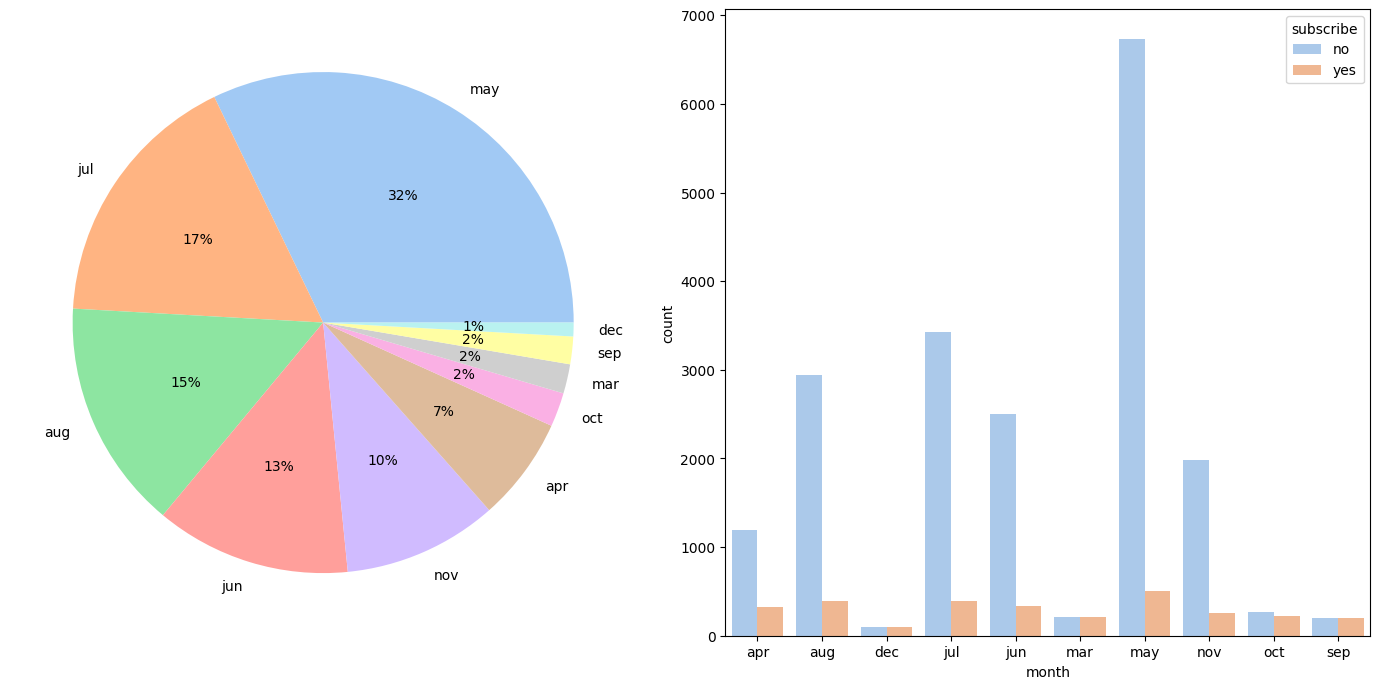

In [32]:
figure,axes=plt.subplots(1,2)
month_counts=train["month"].value_counts()
months=month_counts.index
ax=axes[0].pie(month_counts,labels=months,autopct='%1.0f%%')
sns.countplot(train,x="month",hue="subscribe") 
plt.show()

位于may(5月)联系客户的最多，客户购买情况最高的是位于sep(九月)联系客户

## 最后一次联系星期和认购情况

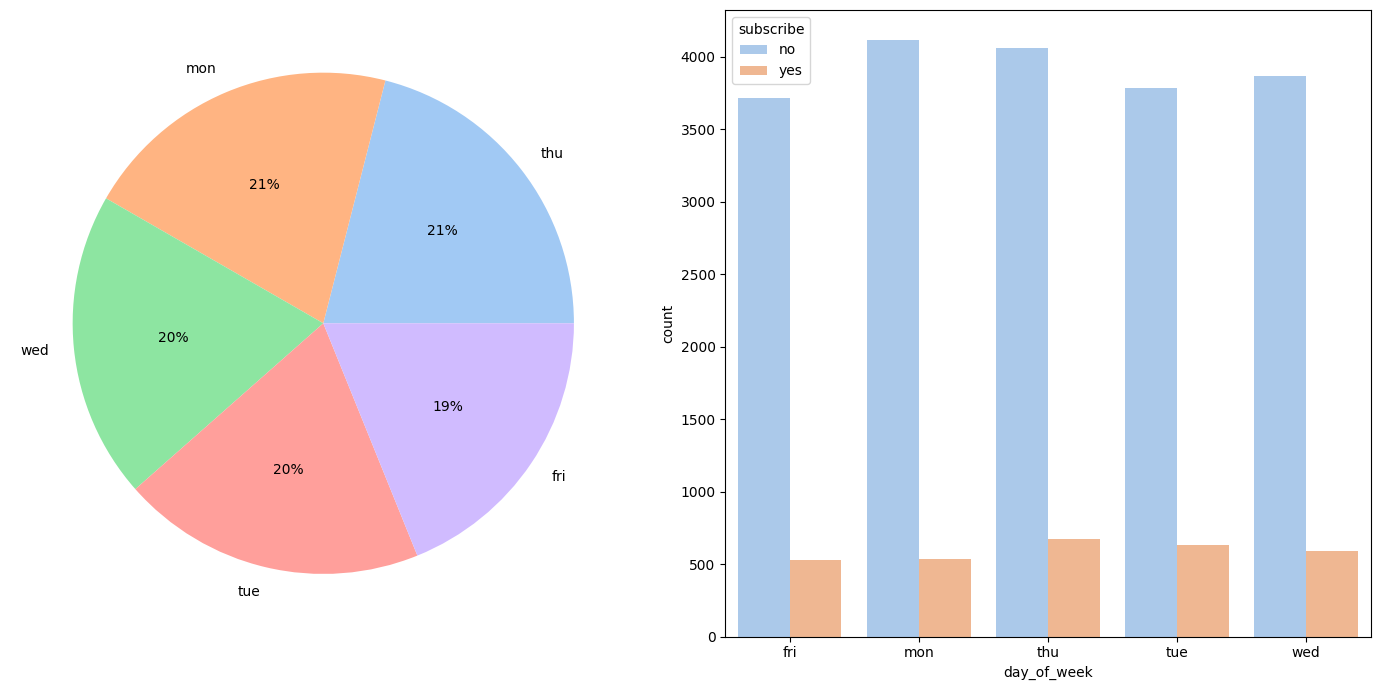

In [33]:
figure,axes=plt.subplots(1,2)
day_of_week_counts=train["day_of_week"].value_counts()
day_of_weeks=day_of_week_counts.index
ax=axes[0].pie(day_of_week_counts,labels=day_of_weeks,autopct='%1.0f%%')
sns.countplot(train,x="day_of_week",hue="subscribe") 
plt.show()

周一至周五每天联系的客户数量都差不多，认购情况也较为相似

## 最后一次联系的持续时间和认购情况

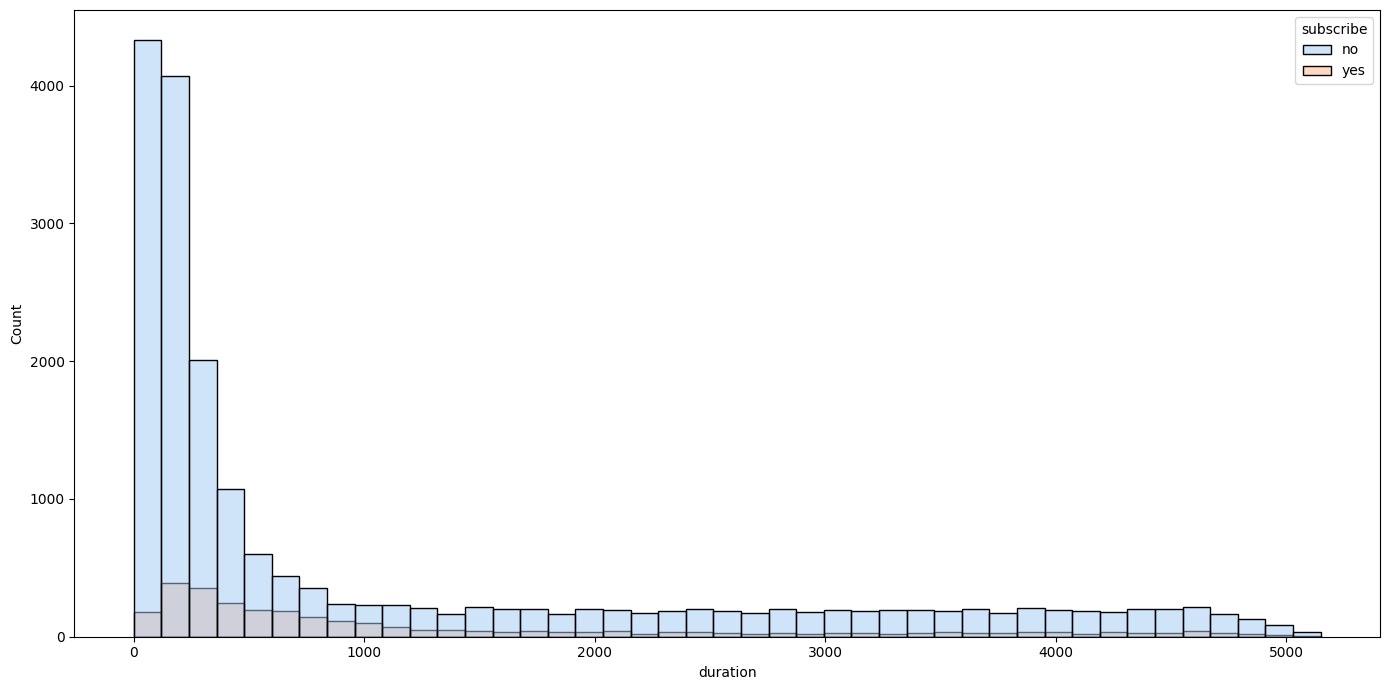

In [34]:
sns.histplot(train,x="duration",hue="subscribe")
plt.show()

联系方式呈右偏态分布，联系人数随着时间的增大而减少，购买概率先增大后减小，在练习时间约为1000(s)时达到最大。

## 活动期间于客户接触次数与认购情况

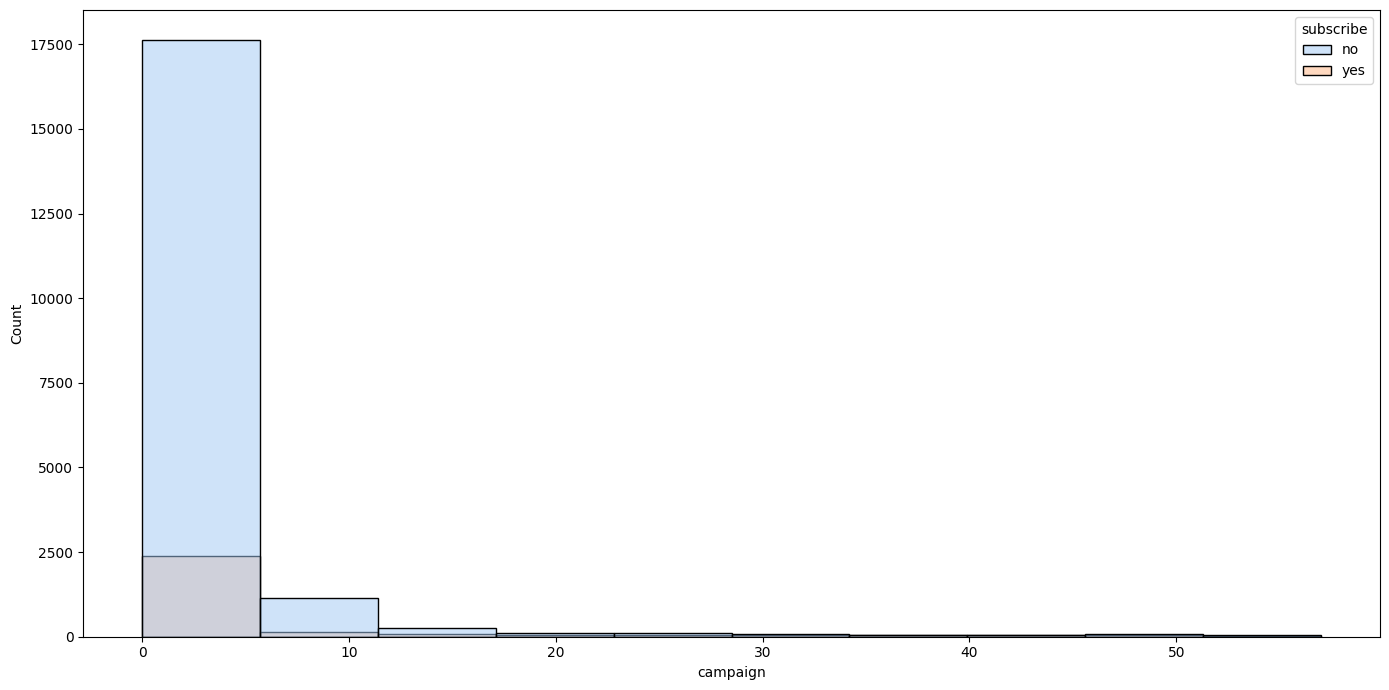

In [35]:
sns.histplot(train,x="campaign",hue="subscribe",bins=10)
plt.show()

客户数量随接触次数的增大而减少，由于接触次数为0~5的客户过多，导致无法准确读出后续接触次数的变换，因此从客户数量2700处开始截取，便于分析后续图表

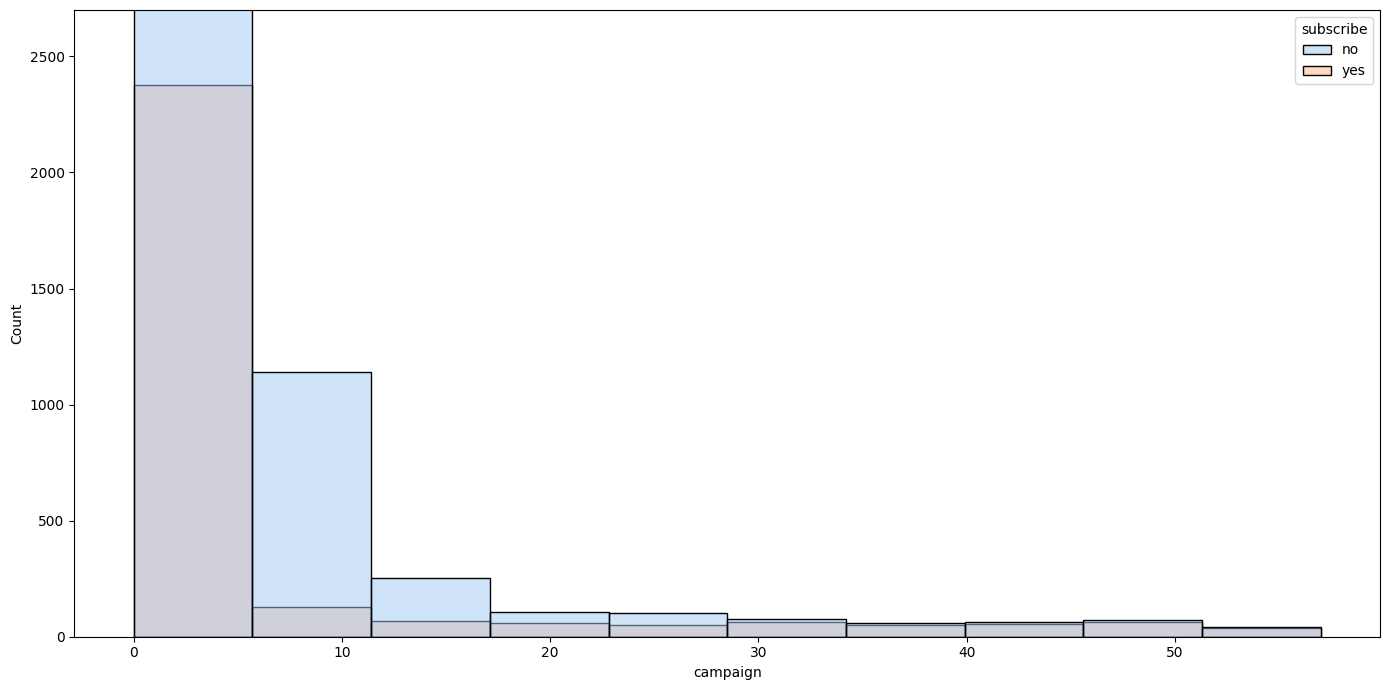

In [36]:
sns.histplot(train,x="campaign",hue="subscribe",bins=10)
plt.ylim(0,2700)
plt.show()

客户的购买意愿随接触次数的增大而增大，接触次数超过30时后，客户将会有较大的购买意愿

## 上次活动中最后一次与客户联系后的天数与认购情况

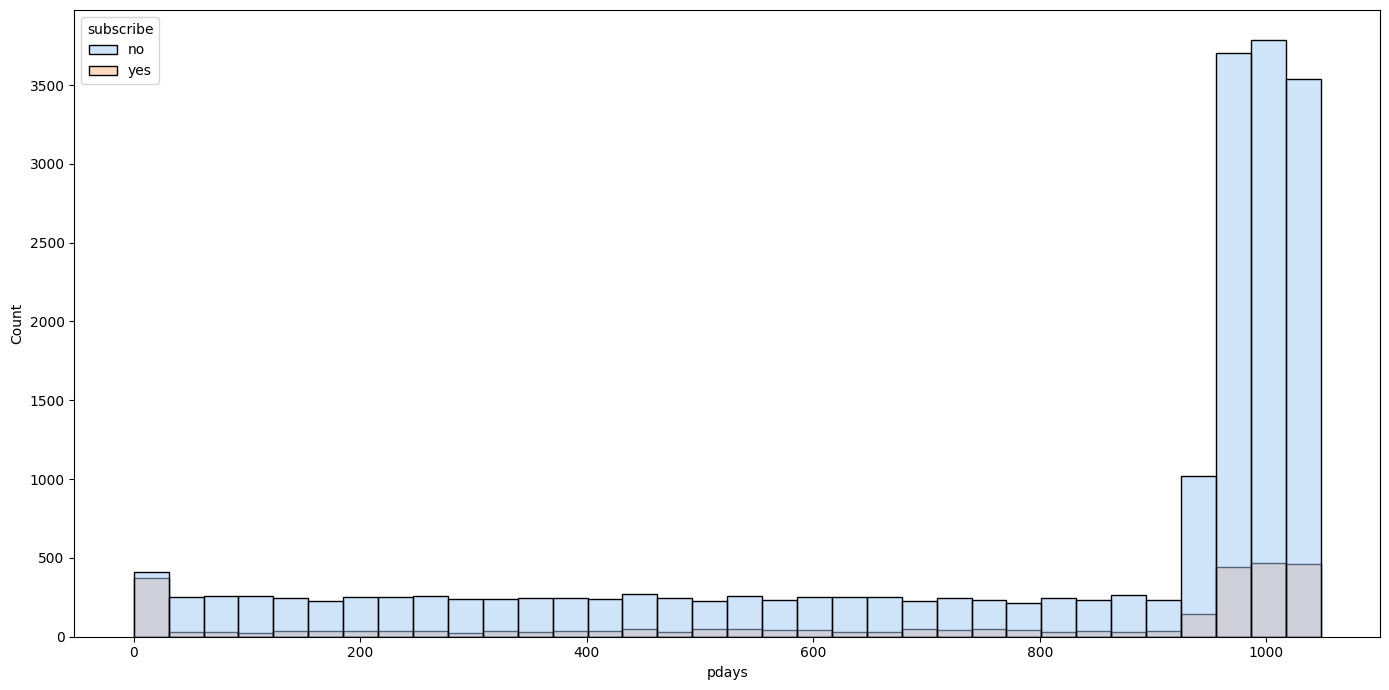

In [37]:
sns.histplot(train,x="pdays",hue="subscribe")
plt.show()

数据呈左偏态分布，上次活动中最后一次与客户联系后的天数为1000左右的客户最多，但上次活动中最后一次与客户联系后的天数约为30左右的客户够意愿最高

## 本次活动前，与该客户进行的接触次数与认购情况

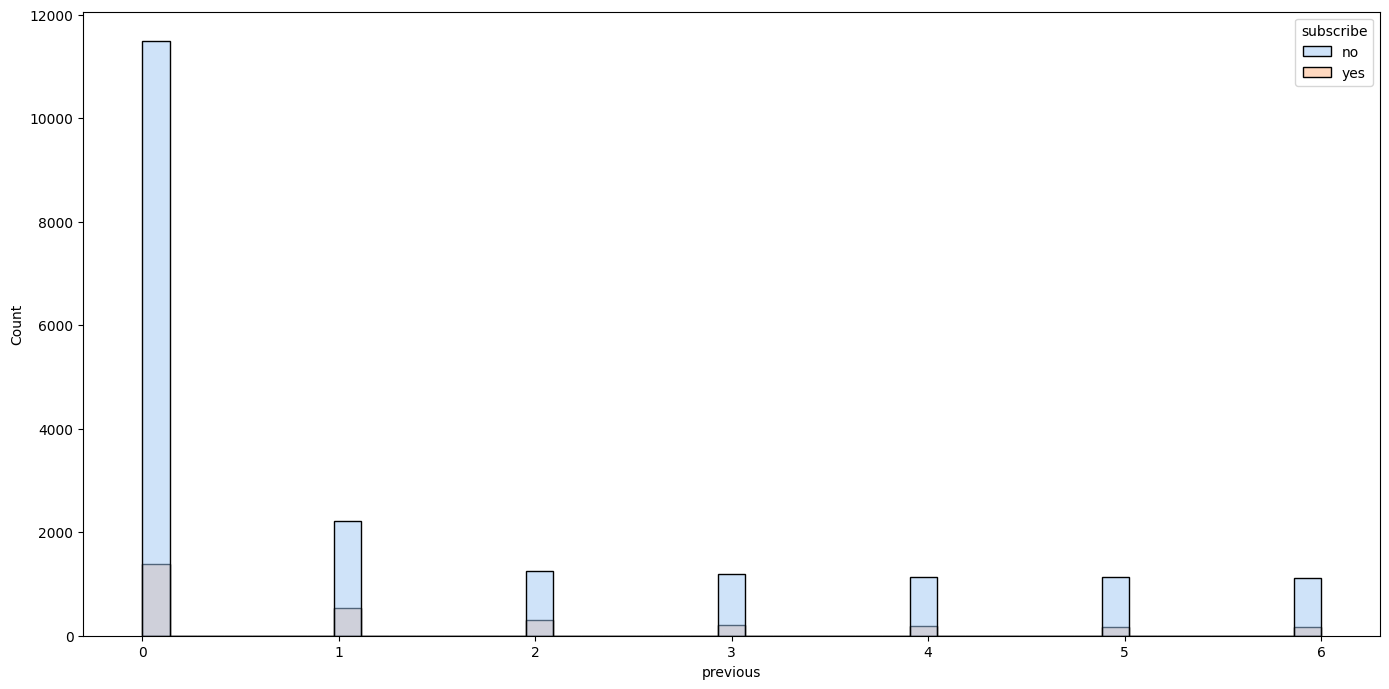

In [38]:
sns.histplot(train,x="previous",hue="subscribe")
plt.show()

本次活动前，没有接触的客户最多，认购概率较好的是接触客户2~3次，没有接触客户的认购概率最低

## 上次营销活动的结果与认购情况

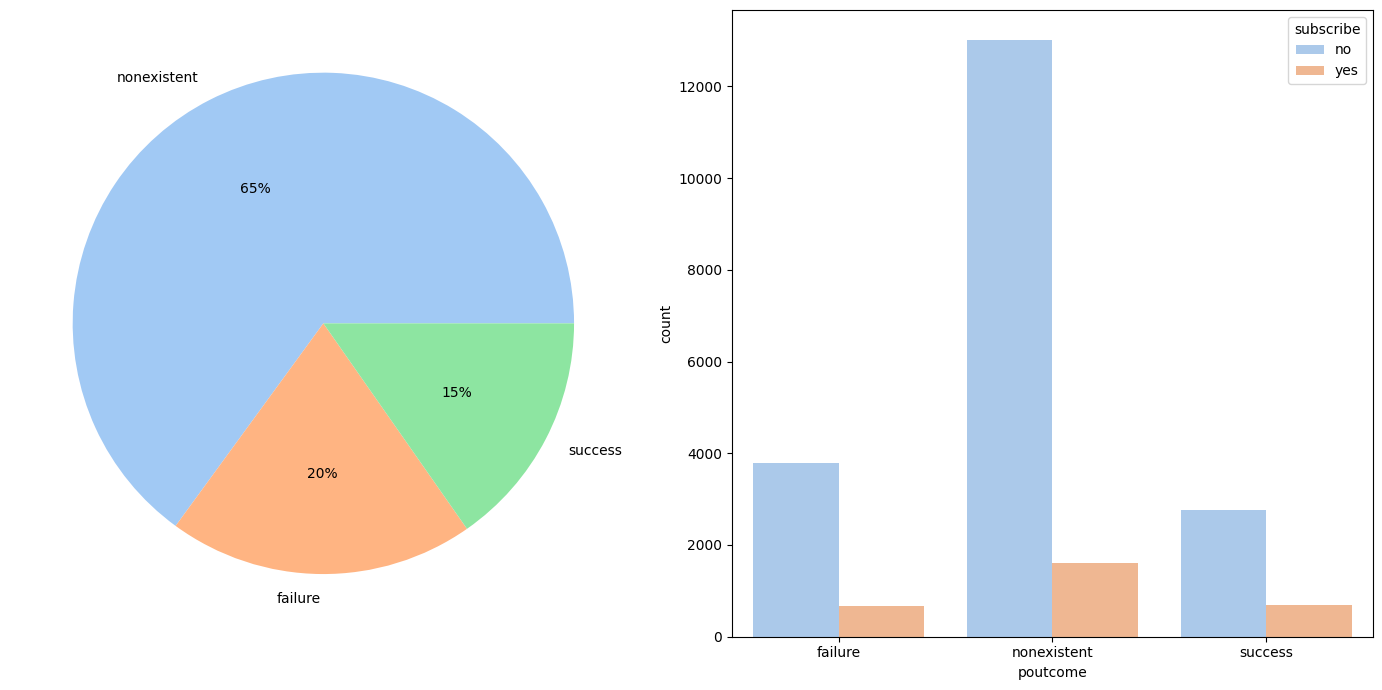

In [39]:
figure,axes=plt.subplots(1,2)
poutcome_counts=train["poutcome"].value_counts()
poutcomes=poutcome_counts.index
ax=axes[0].pie(poutcome_counts,labels=poutcomes,autopct='%1.0f%%')
sns.countplot(train,x="poutcome",hue="subscribe") 
plt.show()

上次营销活动的结果不存在的最多，上次营销活动的结果成功购买的客户有较大概率购买这次的产品

## 就业变化率与认购情况

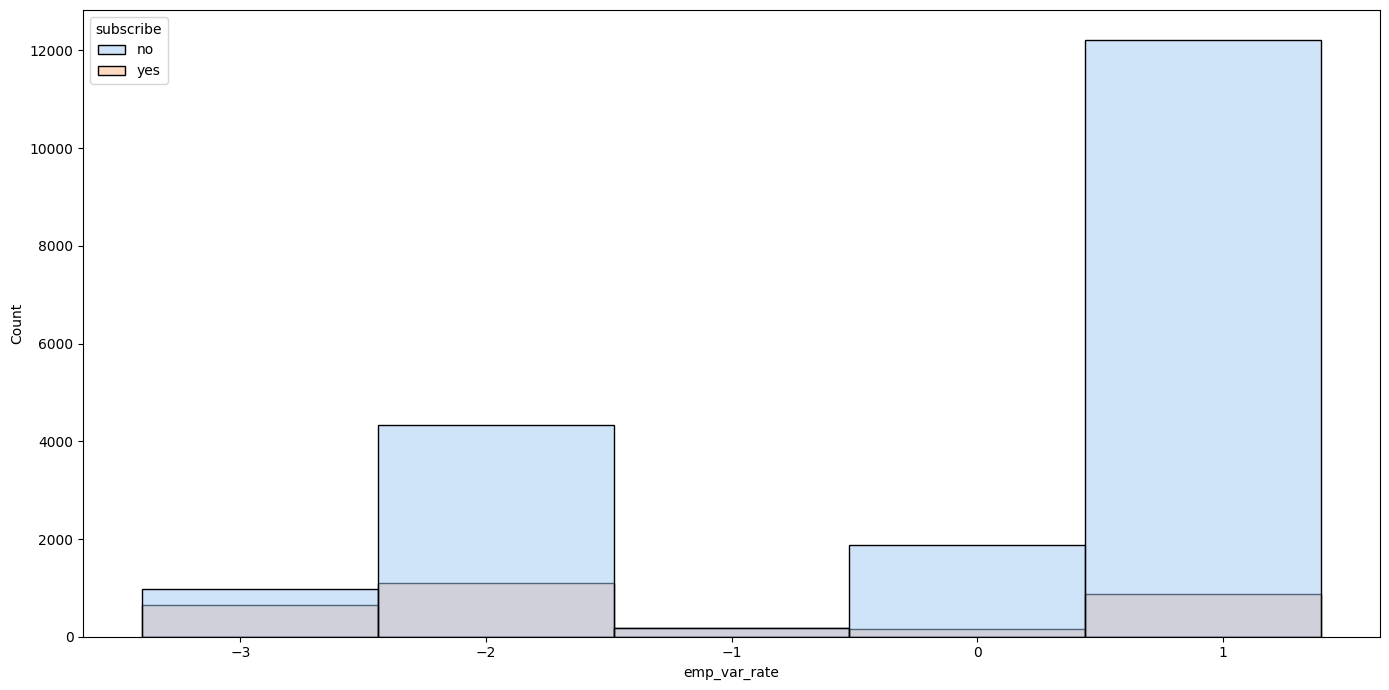

In [40]:
sns.histplot(train,x="emp_var_rate",hue="subscribe",bins=5)
plt.show()

数据呈做偏态分布，就业变化率在1左右的客户最多，就业变化率在-1左右的客户购买概率最高

## 消费者价格指数与认购情况

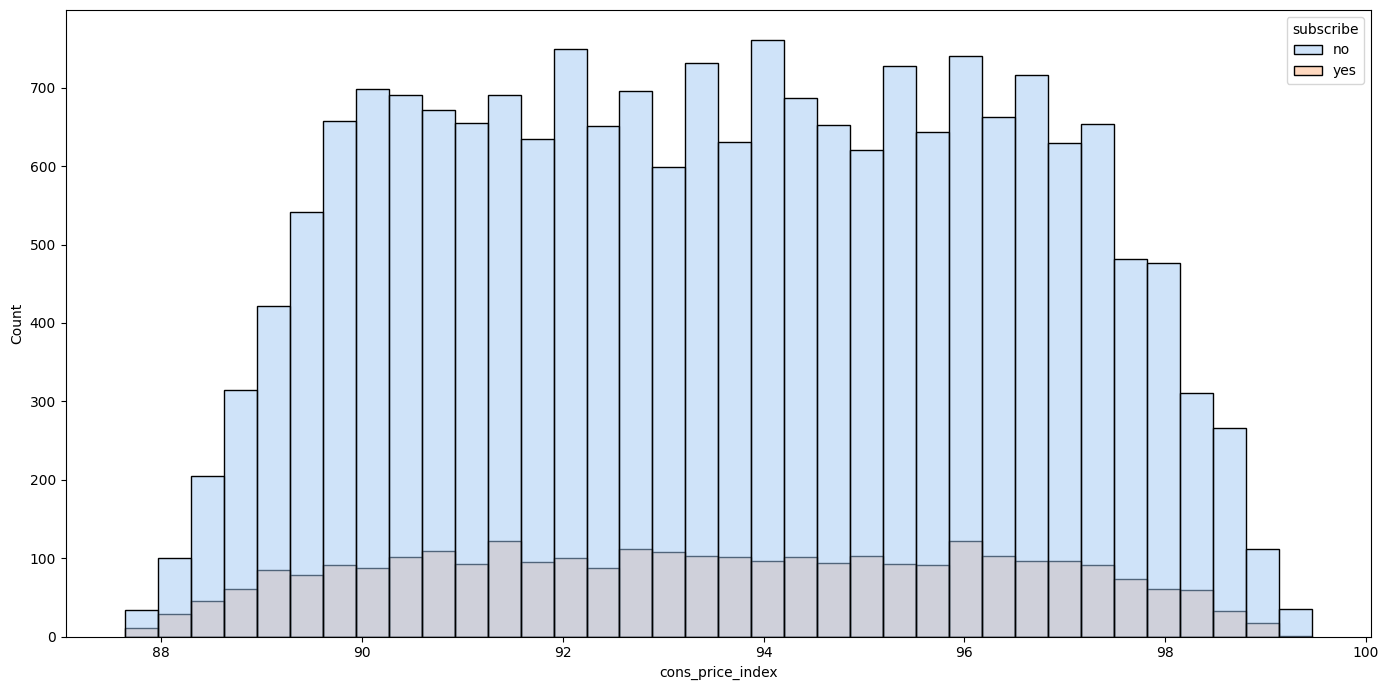

In [41]:
sns.histplot(train,x="cons_price_index",hue="subscribe")
plt.show()

数据较为集重在价格指数为90~98的区间，当价格指数约为88的时候购买概率最高

## 消费者信心指数与认购情况

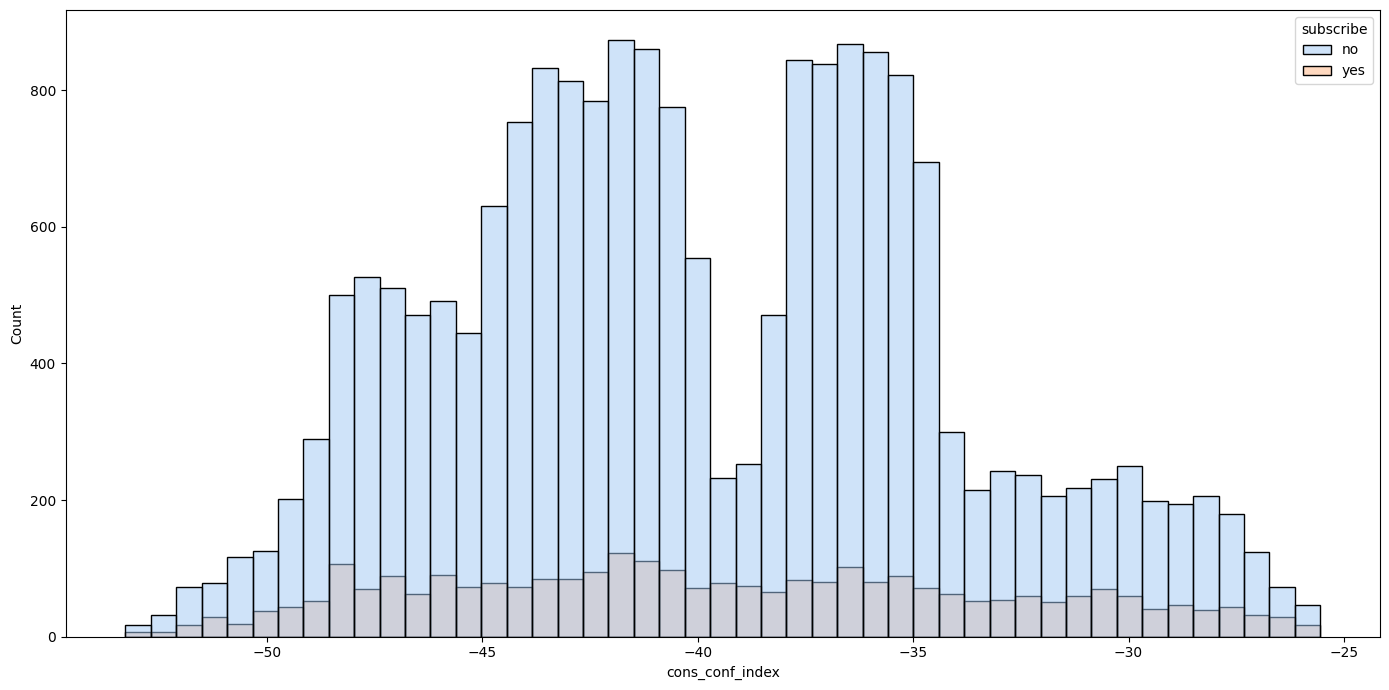

In [42]:
sns.histplot(train,x="cons_conf_index",hue="subscribe")
plt.show()

数据呈双峰分布，约在-36和-41处有两处峰值，当信心指数为-26时候购买概率最高

## 银行3个月定期存款利率与认购情况

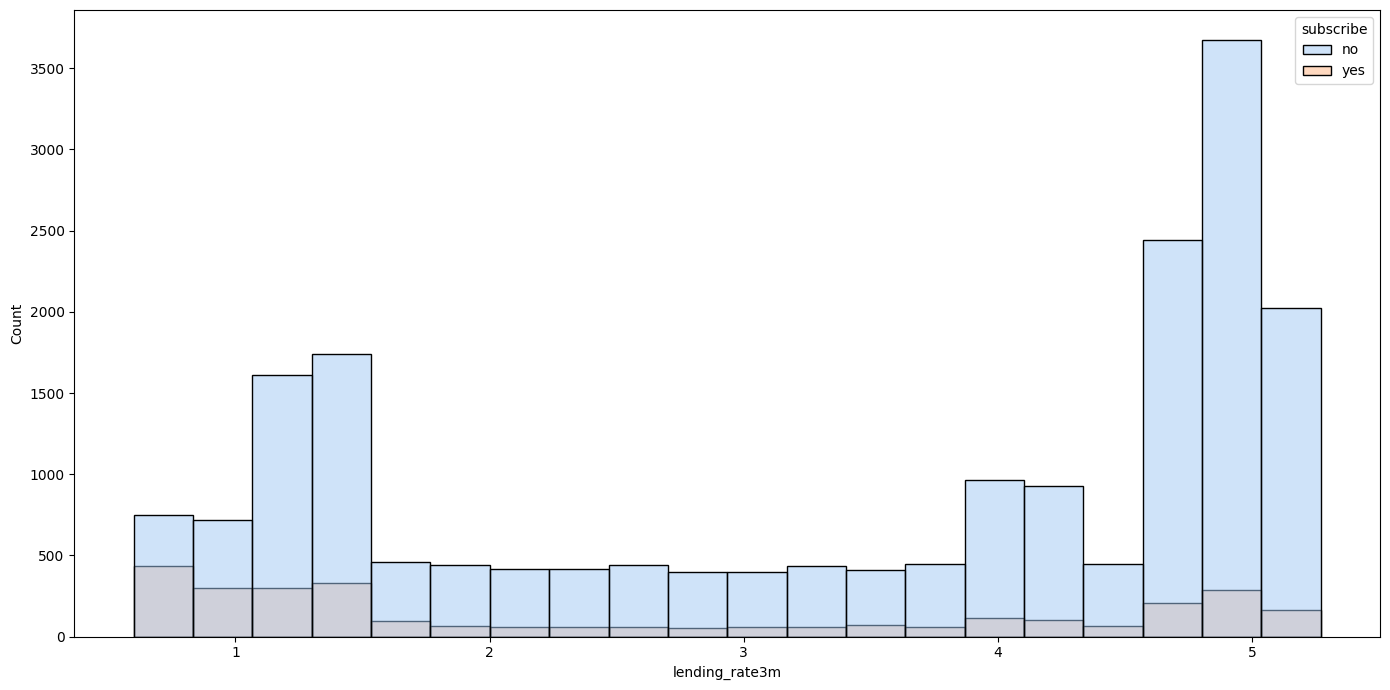

In [43]:
sns.histplot(train,x="lending_rate3m",hue="subscribe")
plt.show()

数据呈双峰分布，在1.5和5处有两个峰值，在5处最多，当利率小于1的时候购买概率最高

## 雇员人数与认购情况

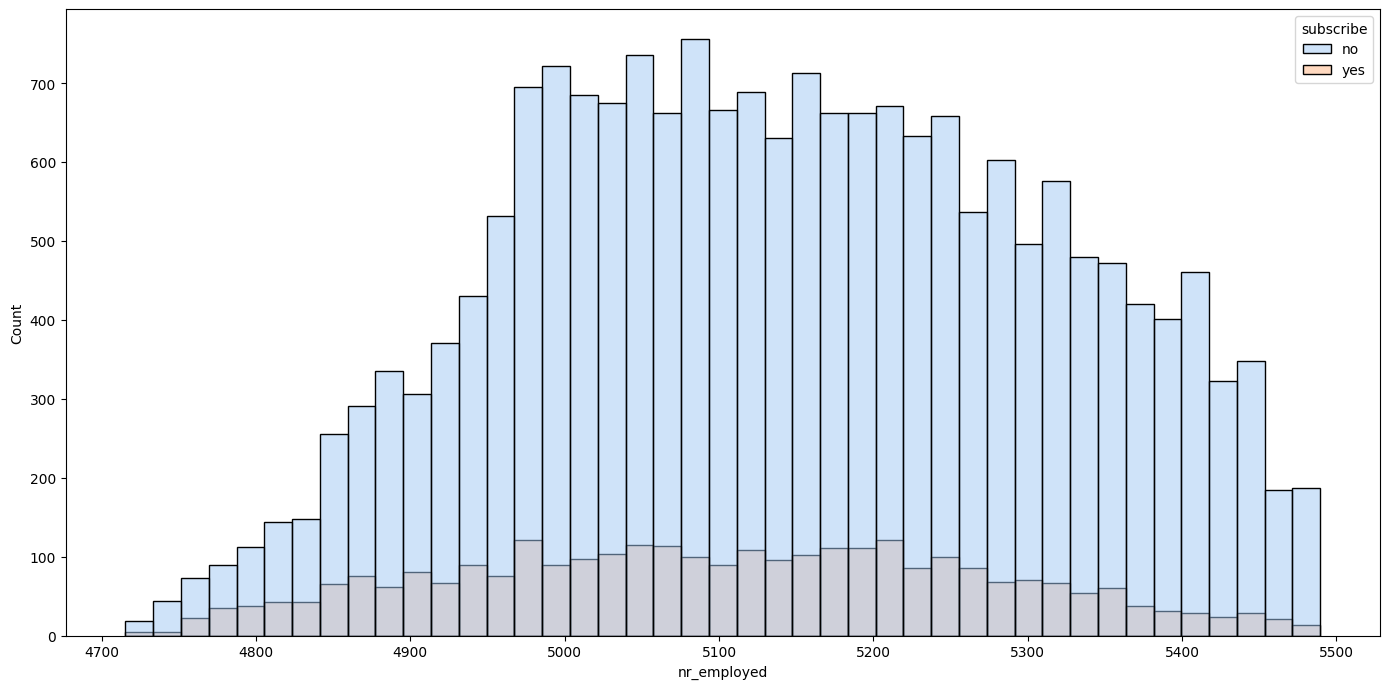

In [44]:
sns.histplot(train,x="nr_employed",hue="subscribe")
plt.show()

数据呈现先增大后减小的趋势，约在5000~5100时达到峰值

# 分析数据

在分析步骤中，我们将利用以上清理过的数据进行逻辑回归分析，目标是得到一个可以根据客户各个属性，对客户进行预测的模型

首先引入逻辑回归所需要的模块

In [45]:
import statsmodels.api as sm

我们将创建一个新的DataFrame Ir_train,让他作为逻辑回归的数据

In [46]:
lr_train=train.copy()
lr_train=pd.get_dummies(lr_train,columns=(["job","marital","education","default","housing",
                                           "loan","contact","month","day_of_week","poutcome"]),dtype=int,drop_first=True)
lr_train.head(10)

,id,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1,51,4621,1,112,2,1.4,90.81,-35.53,0.69,5219.74,no,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,50,4715,1,412,2,-1.8,96.33,-40.58,4.05,4974.79,yes,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,3,48,171,0,1027,1,-1.8,96.33,-44.74,1.50,5022.61,no,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,26,359,26,998,0,1.4,97.08,-35.55,5.11,5222.87,yes,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,45,3178,1,240,4,-3.4,89.82,-33.83,1.17,4884.70,no,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
5,6,47,817,1,10,3,1.4,94.58,-30.37,3.55,5257.02,no,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
6,7,33,76,2,1009,0,1.4,94.93,-35.12,4.74,5018.97,no,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
7,8,40,4391,36,934,4,1.4,94.44,-33.52,4.61,5452.31,no,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
8,9,47,161,0,959,0,1.4,95.40,-37.65,5.09,5358.80,no,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9,10,53,2437,0,594,6,-2.9,93.17,-28.27,2.30,4988.07,yes,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## 引入虚拟变量和划分自变量和因变量

将subscribe中yes重命名为1，no重名为0，将于结果无关的变量id删除后，再划分自变量和因变量

In [47]:
lr_train["subscribe"]=lr_train["subscribe"].astype("str")
lr_train["subscribe"]=lr_train["subscribe"].replace({"yes":"1","no":"0"})
lr_train["subscribe"]=lr_train["subscribe"].astype("int")
lr_train=lr_train.drop("id",axis=1)

In [48]:
y=lr_train["subscribe"]
X=lr_train.drop("subscribe",axis=1)

## 检查自变量间的共线性

检查自变量中数值间俩俩共线性，检查变量之间相关性是否过高过高

In [49]:
X.corr().abs()>0.8

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
age,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
duration,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
campaign,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
pdays,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
previous,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
emp_var_rate,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
cons_price_index,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
cons_conf_index,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
lending_rate3m,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
nr_employed,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

由于数据过多，不易于观察，统计每行中true出现的次数

In [50]:
xg=X.corr().abs()>0.8
xg.sum()

age                              1
duration                         1
campaign                         1
pdays                            1
previous                         1
emp_var_rate                     1
cons_price_index                 1
cons_conf_index                  1
lending_rate3m                   1
nr_employed                      1
job_blue-collar                  1
job_entrepreneur                 1
job_housemaid                    1
job_management                   1
job_retired                      1
job_self-employed                1
job_services                     1
job_student                      1
job_technician                   1
job_unemployed                   1
job_unknown                      1
marital_married                  1
marital_single                   1
marital_unknown                  1
education_basic.6y               1
education_basic.9y               1
education_high.school            1
education_illiterate             1
education_profession

发现么个数字除了与自己相关外其余均不相关

# 添加截距和查看哪些变量对结果没有影响

给线性方程添加截距

In [51]:
X=sm.add_constant(X)

调用Logit函数，得到回归模型的参数并输出总结信息

In [52]:
result=sm.Logit(y,X).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.315679
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              subscribe   No. Observations:                22500
Model:                          Logit   Df Residuals:                    22446
Method:                           MLE   Df Model:                           53
Date:                Sat, 29 Mar 2025   Pseudo R-squ.:                  0.1878
Time:                        16:29:38   Log-Likelihood:                -7102.8
converged:                       True   LL-Null:                       -8744.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -2.4325      1.031     -2.360      0.018      -4.453      -0.412
age                               0.0076      0.002      3.975      0.000       0.004       0.011
duration                       4.405e-05   1.78e-05      2.469      0.014    9.09e-06     7.9e-05
campaign                          0.0254      0.003      8.611      0.000       0.020       0.031
pdays                            -0.0005    8.1e-05     -6.262      0.000      -0.001      -0.000
previous                         -0.0633      0.015     -4.334      0.000      -0.092      -0.035
emp_var_rate                     -0.4141      0.019    -21.770      0.000      -0.451      -0.377
cons_price_index                  0.0118      0.008      1.502      0.133      -0.004       0.027
cons_conf_index                   0.0022      0.004      0.593      0.553      -0.005       0.009
lending_rate3m                   -0.0404      0.018     -2.260      0.024      -0.075      -0.005
nr_employed                      -0.0002      0.000     -1.155      0.248      -0.000       0.000
job_blue-collar                  -0.2346      0.086     -2.727      0.006      -0.403      -0.066
job_entrepreneur                 -0.0458      0.125     -0.366      0.714      -0.291       0.199
job_housemaid                     0.0621      0.138      0.450      0.653      -0.208       0.332
job_management                   -0.0102      0.093     -0.109      0.913      -0.193       0.172
job_retired                       0.2361      0.108      2.188      0.029       0.025       0.448
job_self-employed                 0.1331      0.115      1.161      0.246      -0.092       0.358
job_services                     -0.1425      0.095     -1.494      0.135      -0.330       0.044
job_student                       0.3504      0.115      3.042      0.002       0.125       0.576
job_technician                   -0.0392      0.079     -0.498      0.619      -0.193       0.115
job_unemployed                    0.2284      0.123      1.857      0.063      -0.013       0.470
job_unknown                       0.2537      0.181      1.403      0.160      -0.101       0.608
marital_married                   0.0098      0.072      0.137      0.891      -0.131       0.151
marital_single                    0.2889      0.079      3.676      0.000       0.135       0.443
marital_unknown                   0.7044      0.152      4.630      0.000       0.406       1.003
education_basic.6y                0.1834      0.120      1.524      0.127      -0.052       0.419
education_basic.9y                0.0139      0.100      0.139      0.890      -0.183       0.211
education_high.school             0.0123      0.097      0.127      0.899      -0.177       0.202
education_illiterate              0.6000      0.206      2.916      0.004       0.197       1.003
education_professional.course     0.1776      0.105      1.685      0.092      -0.029       0.384
educati

将p值设置为0.05，查看模型认为哪些值对结果没有影响，模型认为cons_price_index,cons_conf_index，nr_employed，job_entrepreneur，job_housemaid，job_management,job_self-employed，job_services，job_technician，job_unemployed，job_unknown，marital_married，education_basic.6y，education_basic.9y，education_high.school，education_university.degree,education_university.degree,education_unknown,housing_yes,loan_yes,
month_aug,day_of_week_mon,poutcome_nonexistent,对结果有影响，因此将这些变量移处后再进行查看

In [53]:
X=X.drop(["cons_price_index","cons_conf_index","nr_employed","job_entrepreneur","job_housemaid","job_management","job_self-employed",
          "job_services","job_technician","job_unemployed","job_unknown","marital_married","education_basic.6y","education_basic.9y",
          "education_high.school","education_professional.course","education_university.degree","education_unknown","housing_yes",
          "loan_yes","month_aug","day_of_week_mon","poutcome_nonexistent"],axis=1)
result=sm.Logit(y,X).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.316388
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              subscribe   No. Observations:                22500
Model:                          Logit   Df Residuals:                    22469
Method:                           MLE   Df Model:                           30
Date:                Sat, 29 Mar 2025   Pseudo R-squ.:                  0.1860
Time:                        16:29:39   Log-Likelihood:                -7118.7
converged:                       True   LL-Null:                       -8744.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.1352      0.133    -16.051      0.000      -2.396      -1.875
age                      0.0081      0.002      4.304      0.000       0.004       0.012
duration              4.111e-05   1.77e-05      2.326      0.020    6.47e-06    7.58e-05
campaign                 0.0261      0.003      8.992      0.000       0.020       0.032
pdays                   -0.0005   7.97e-05     -6.411      0.000      -0.001      -0.000
previous                -0.0658      0.014     -4.618      0.000      -0.094      -0.038
emp_var_rate            -0.4092      0.018    -22.232      0.000      -0.445      -0.373
lending_rate3m          -0.0391      0.017     -2.250      0.024      -0.073      -0.005
job_blue-collar         -0.2617      0.064     -4.070      0.000      -0.388      -0.136
job_retired              0.2116      0.096      2.195      0.028       0.023       0.401
job_student              0.3377      0.107      3.165      0.002       0.129       0.547
marital_single           0.2842      0.051      5.525      0.000       0.183       0.385
marital_unknown          0.7058      0.143      4.923      0.000       0.425       0.987
education_illiterate     0.5533      0.193      2.864      0.004       0.175       0.932
default_unknown         -0.1432      0.065     -2.188      0.029      -0.271      -0.015
default_yes              0.8655      0.136      6.344      0.000       0.598       1.133
housing_unknown         -0.2338      0.119     -1.970      0.049      -0.467      -0.001
loan_unknown             0.6778      0.117      5.818      0.000       0.449       0.906
contact_telephone       -0.2779      0.060     -4.627      0.000      -0.396      -0.160
month_dec                0.8008      0.162      4.951      0.000       0.484       1.118
month_jul                0.2294      0.074      3.081      0.002       0.083       0.375
month_jun                0.1762      0.082      2.157      0.031       0.016       0.336
month_mar                1.0963      0.112      9.811      0.000       0.877       1.315
month_may               -0.6585      0.067     -9.847      0.000      -0.790      -0.527
month_nov               -0.3212      0.082     -3.908      0.000      -0.482      -0.160
month_oct                0.6912      0.108      6.374      0.000       0.479       0.904
month_sep                0.8650      0.117      7.393      0.000       0.636       1.094
day_of_week_thu          0.2395      0.058      4.096      0.000       0.125       0.354
day_of_week_tue          0.2373      0.060      3.925      0.000       0.119       0.356
day_of_week_wed          0.2331      0.061      3.815      0.000       0.113       0.353
poutcome_success         0.2881      0.062      4.610      0.000       0.166       0.411
========================================================================================
"""

删除后发现housing_unknown的p值过于接近0.05因此也可以删除

In [54]:
X=X.drop(["housing_unknown"],axis=1)
result=sm.Logit(y,X).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.316475
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              subscribe   No. Observations:                22500
Model:                          Logit   Df Residuals:                    22470
Method:                           MLE   Df Model:                           29
Date:                Sat, 29 Mar 2025   Pseudo R-squ.:                  0.1857
Time:                        16:29:39   Log-Likelihood:                -7120.7
converged:                       True   LL-Null:                       -8744.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.1308      0.133    -16.033      0.000      -2.391      -1.870
age                      0.0080      0.002      4.244      0.000       0.004       0.012
duration              4.121e-05   1.77e-05      2.331      0.020    6.56e-06    7.58e-05
campaign                 0.0256      0.003      8.877      0.000       0.020       0.031
pdays                   -0.0005   7.97e-05     -6.414      0.000      -0.001      -0.000
previous                -0.0656      0.014     -4.599      0.000      -0.093      -0.038
emp_var_rate            -0.4087      0.018    -22.212      0.000      -0.445      -0.373
lending_rate3m          -0.0393      0.017     -2.262      0.024      -0.073      -0.005
job_blue-collar         -0.2593      0.064     -4.035      0.000      -0.385      -0.133
job_retired              0.2153      0.096      2.234      0.025       0.026       0.404
job_student              0.3398      0.107      3.191      0.001       0.131       0.549
marital_single           0.2832      0.051      5.509      0.000       0.182       0.384
marital_unknown          0.6934      0.143      4.848      0.000       0.413       0.974
education_illiterate     0.5288      0.192      2.755      0.006       0.153       0.905
default_unknown         -0.1481      0.065     -2.265      0.023      -0.276      -0.020
default_yes              0.8600      0.136      6.324      0.000       0.593       1.127
loan_unknown             0.5502      0.096      5.733      0.000       0.362       0.738
contact_telephone       -0.2801      0.060     -4.667      0.000      -0.398      -0.162
month_dec                0.8003      0.162      4.955      0.000       0.484       1.117
month_jul                0.2304      0.074      3.094      0.002       0.084       0.376
month_jun                0.1768      0.082      2.164      0.030       0.017       0.337
month_mar                1.0963      0.112      9.823      0.000       0.878       1.315
month_may               -0.6577      0.067     -9.836      0.000      -0.789      -0.527
month_nov               -0.3199      0.082     -3.894      0.000      -0.481      -0.159
month_oct                0.6875      0.108      6.345      0.000       0.475       0.900
month_sep                0.8623      0.117      7.376      0.000       0.633       1.091
day_of_week_thu          0.2396      0.058      4.098      0.000       0.125       0.354
day_of_week_tue          0.2360      0.060      3.905      0.000       0.118       0.354
day_of_week_wed          0.2337      0.061      3.826      0.000       0.114       0.353
poutcome_success         0.2857      0.062      4.572      0.000       0.163       0.408
========================================================================================
"""

In [55]:
X

,const,age,duration,campaign,pdays,previous,emp_var_rate,lending_rate3m,job_blue-collar,job_retired,job_student,marital_single,marital_unknown,education_illiterate,default_unknown,default_yes,loan_unknown,contact_telephone,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_success
0,1.0,51,4621,1,112,2,1.4,0.69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,50,4715,1,412,2,-1.8,4.05,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1.0,48,171,0,1027,1,-1.8,1.50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1.0,26,359,26,998,0,1.4,5.11,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,45,3178,1,240,4,-3.4,1.17,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,1.0,33,4031,3,925,3,-2.9,3.36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22496,1.0,34,3185,14,533,3,1.4,4.41,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
22497,1.0,25,2363,0,792,5,-1.8,4.05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
22498,1.0,57,576,5,989,0,1.1,4.95,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


# 预测结果

读取text文件，预估客户的接受可能

In [56]:
text=pd.read_csv("C:/Users/Lenovo/Downloads/作品/银行/test.csv")
text

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed
0,22501,35,technician,single,professional.course,no,yes,yes,cellular,aug,mon,3295,1,476,0,success,1.4,95.37,-33.04,3.63,5204.54
1,22502,26,admin.,single,high.school,no,yes,no,cellular,may,thu,2872,1,166,2,success,-1.8,91.75,-44.42,3.16,4924.78
2,22503,44,blue-collar,married,basic.6y,no,no,no,telephone,may,mon,268,3,968,0,nonexistent,1.1,89.67,-36.90,5.04,4947.02
3,22504,36,blue-collar,married,basic.9y,no,yes,no,telephone,nov,thu,30,1,432,5,success,-0.1,89.87,-41.66,3.27,5203.33
4,22505,41,blue-collar,married,basic.4y,no,yes,no,telephone,may,thu,1670,1,944,3,success,1.1,97.64,-36.32,3.95,4992.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,29996,49,admin.,unknown,university.degree,unknown,yes,yes,telephone,apr,fri,3937,50,302,1,failure,-1.8,95.77,-40.50,3.86,5058.64
7496,29997,34,blue-collar,married,basic.4y,no,no,no,cellular,jul,wed,584,8,440,3,failure,1.4,90.59,-47.29,1.77,5156.70
7497,29998,50,retired,single,basic.4y,no,yes,no,cellular,jun,mon,102,3,997,0,nonexistent,-2.9,97.42,-39.69,1.29,5116.80
7498,29999,31,technician,married,professional.course,no,no,no,cellular,aug,thu,179,3,1028,0,nonexistent,1.4,96.90,-37.68,5.18,5144.45


查看是否有空值

In [57]:
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7500 non-null   int64  
 1   age               7500 non-null   int64  
 2   job               7500 non-null   object 
 3   marital           7500 non-null   object 
 4   education         7500 non-null   object 
 5   default           7500 non-null   object 
 6   housing           7500 non-null   object 
 7   loan              7500 non-null   object 
 8   contact           7500 non-null   object 
 9   month             7500 non-null   object 
 10  day_of_week       7500 non-null   object 
 11  duration          7500 non-null   int64  
 12  campaign          7500 non-null   int64  
 13  pdays             7500 non-null   int64  
 14  previous          7500 non-null   int64  
 15  poutcome          7500 non-null   object 
 16  emp_var_rate      7500 non-null   float64


text中没有空缺数

下一步是给分类变量引入虚拟变量的种类

In [58]:
text["job"]=pd.Categorical(text["job"],categories=["admin","blue-collar","technician","services" ,"management","retired","entrepreneur",
                                                "self-employed","housemaid","unemployed","student","unknown"])
text["marital"]=pd.Categorical(text["marital"],categories=["divorced","single","married","unknown"])
text["education"]=pd.Categorical(text["education"],categories=["basic.4y","high.school","basic.9y","professional.course","university.degree",
                                                            "basic.6y","unknown","illiterate"])
text["default"]=pd.Categorical(text["default"],categories=["no","unknow","yes"])
text["housing"]=pd.Categorical(text["housing"],categories=["no","unknown","yes"])
text["loan"]=pd.Categorical(text["loan"],categories=["no","unknow","yes"])
text["contact"]=pd.Categorical(text["contact"],categories=["celluar","telephone"])
text["month"]=pd.Categorical(text["month"],categories=["apr","jul","aug","jun","nov","may","oct","mar","sep","dec"])
text["day_of_week"]=pd.Categorical(text["day_of_week"],categories=["fri","mon","wed","tue","thu"])
text["poutcome"]=pd.Categorical(text["poutcome"],categories=["failure","nonexistent","success"])

引入虚拟变量

In [59]:
text=pd.get_dummies(text,columns=(["job","marital","education","default","housing",
                                           "loan","contact","month","day_of_week","poutcome"]),dtype=int,drop_first=True)
text

,id,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,job_blue-collar,job_technician,job_services,job_management,job_retired,job_entrepreneur,job_self-employed,job_housemaid,job_unemployed,job_student,job_unknown,marital_single,marital_married,marital_unknown,education_high.school,education_basic.9y,education_professional.course,education_university.degree,education_basic.6y,education_unknown,education_illiterate,default_unknow,default_yes,housing_unknown,housing_yes,loan_unknow,loan_yes,contact_telephone,month_jul,month_aug,month_jun,month_nov,month_may,month_oct,month_mar,month_sep,month_dec,day_of_week_mon,day_of_week_wed,day_of_week_tue,day_of_week_thu,poutcome_nonexistent,poutcome_success
0,22501,35,3295,1,476,0,1.4,95.37,-33.04,3.63,5204.54,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,22502,26,2872,1,166,2,-1.8,91.75,-44.42,3.16,4924.78,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
2,22503,44,268,3,968,0,1.1,89.67,-36.90,5.04,4947.02,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,22504,36,30,1,432,5,-0.1,89.87,-41.66,3.27,5203.33,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
4,22505,41,1670,1,944,3,1.1,97.64,-36.32,3.95,4992.02,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,29996,49,3937,50,302,1,-1.8,95.77,-40.50,3.86,5058.64,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7496,29997,34,584,8,440,3,1.4,90.59,-47.29,1.77,5156.70,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7497,29998,50,102,3,997,0,-2.9,97.42,-39.69,1.29,5116.80,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
7498,29999,31,179,3,1028,0,1.4,96.90,-37.68,5.18,5144.45,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0


In [60]:
text.head(10)

,id,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,job_blue-collar,job_technician,job_services,job_management,job_retired,job_entrepreneur,job_self-employed,job_housemaid,job_unemployed,job_student,job_unknown,marital_single,marital_married,marital_unknown,education_high.school,education_basic.9y,education_professional.course,education_university.degree,education_basic.6y,education_unknown,education_illiterate,default_unknow,default_yes,housing_unknown,housing_yes,loan_unknow,loan_yes,contact_telephone,month_jul,month_aug,month_jun,month_nov,month_may,month_oct,month_mar,month_sep,month_dec,day_of_week_mon,day_of_week_wed,day_of_week_tue,day_of_week_thu,poutcome_nonexistent,poutcome_success
0,22501,35,3295,1,476,0,1.4,95.37,-33.04,3.63,5204.54,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,22502,26,2872,1,166,2,-1.8,91.75,-44.42,3.16,4924.78,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
2,22503,44,268,3,968,0,1.1,89.67,-36.90,5.04,4947.02,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,22504,36,30,1,432,5,-0.1,89.87,-41.66,3.27,5203.33,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
4,22505,41,1670,1,944,3,1.1,97.64,-36.32,3.95,4992.02,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
5,22506,24,126,1,976,0,1.4,89.31,-43.34,4.75,4992.83,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
6,22507,25,2493,2,7,1,1.4,97.62,-46.67,0.84,5154.56,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,22508,33,597,1,547,6,1.4,90.92,-29.99,2.74,5033.87,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
8,22509,41,341,1,1023,0,1.4,93.53,-36.20,4.80,5097.39,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
9,22510,49,121,3,1005,0,1.4,89.40,-40.73,4.87,5306.52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


使得带入的值与系数一一对应

In [61]:
X_text=text.drop(["id","cons_price_index","cons_conf_index","nr_employed","job_entrepreneur","job_housemaid","job_management","job_self-employed",
          "job_services","job_technician","job_unemployed","job_unknown","marital_married","education_basic.6y","education_basic.9y",
          "education_high.school","education_professional.course","education_university.degree","education_unknown","housing_yes",
          "loan_yes","month_aug","day_of_week_mon","poutcome_nonexistent","housing_unknown"],axis=1)
X_text=sm.add_constant(X_text)
X_text

,const,age,duration,campaign,pdays,previous,emp_var_rate,lending_rate3m,job_blue-collar,job_retired,job_student,marital_single,marital_unknown,education_illiterate,default_unknow,default_yes,loan_unknow,contact_telephone,month_jul,month_jun,month_nov,month_may,month_oct,month_mar,month_sep,month_dec,day_of_week_wed,day_of_week_tue,day_of_week_thu,poutcome_success
0,1.0,35,3295,1,476,0,1.4,3.63,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.0,26,2872,1,166,2,-1.8,3.16,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
2,1.0,44,268,3,968,0,1.1,5.04,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,1.0,36,30,1,432,5,-0.1,3.27,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
4,1.0,41,1670,1,944,3,1.1,3.95,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,1.0,49,3937,50,302,1,-1.8,3.86,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7496,1.0,34,584,8,440,3,1.4,1.77,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
7497,1.0,50,102,3,997,0,-2.9,1.29,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7498,1.0,31,179,3,1028,0,1.4,5.18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


计算顾客购买概率

In [62]:
predicted_text=result.predict(X_text)
predicted_text

0       0.111104
1       0.625915
2       0.093003
3       0.091432
4       0.128191
          ...   
7495    0.617824
7496    0.128617
7497    0.426256
7498    0.053821
7499    0.078059
Length: 7500, dtype: float64

假定结果大于0.5时顾客会购买，输出结果，并保存在new_text中

In [63]:
subscribe=(predicted_text>0.5).astype(int)
subscribe

0       0
1       1
2       0
3       0
4       0
       ..
7495    1
7496    0
7497    0
7498    0
7499    0
Length: 7500, dtype: int64

In [64]:
text["subscribe"]=subscribe
text["subscribe"]=text["subscribe"].astype("str")
text["subscribe"]=text["subscribe"].replace({"1":"yes","0":"no"})
text

,id,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,job_blue-collar,job_technician,job_services,job_management,job_retired,job_entrepreneur,job_self-employed,job_housemaid,job_unemployed,job_student,job_unknown,marital_single,marital_married,marital_unknown,education_high.school,education_basic.9y,education_professional.course,education_university.degree,education_basic.6y,education_unknown,education_illiterate,default_unknow,default_yes,housing_unknown,housing_yes,loan_unknow,loan_yes,contact_telephone,month_jul,month_aug,month_jun,month_nov,month_may,month_oct,month_mar,month_sep,month_dec,day_of_week_mon,day_of_week_wed,day_of_week_tue,day_of_week_thu,poutcome_nonexistent,poutcome_success,subscribe
0,22501,35,3295,1,476,0,1.4,95.37,-33.04,3.63,5204.54,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,no
1,22502,26,2872,1,166,2,-1.8,91.75,-44.42,3.16,4924.78,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,yes
2,22503,44,268,3,968,0,1.1,89.67,-36.90,5.04,4947.02,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,no
3,22504,36,30,1,432,5,-0.1,89.87,-41.66,3.27,5203.33,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,no
4,22505,41,1670,1,944,3,1.1,97.64,-36.32,3.95,4992.02,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,29996,49,3937,50,302,1,-1.8,95.77,-40.50,3.86,5058.64,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,yes
7496,29997,34,584,8,440,3,1.4,90.59,-47.29,1.77,5156.70,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,no
7497,29998,50,102,3,997,0,-2.9,97.42,-39.69,1.29,5116.80,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,no
7498,29999,31,179,3,1028,0,1.4,96.90,-37.68,5.18,5144.45,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,no


In [65]:
text.to_csv("new_text.csv",index=False)